# **Task 21 - (Article 119)** [![Static Badge](https://img.shields.io/badge/Open%20in%20Colab%20-%20orange?style=plastic&logo=googlecolab&labelColor=grey)](https://colab.research.google.com/github/sshrizvi/DS-Python/blob/main/Pandas/Tasks/task_21.ipynb)

|🔴 **WARNING** 🔴|
|:-----------:|
|If you have not studied article 119. Do checkout the articles before attempting the task.|
| Here is [MultiIndex Series and DataFrames](../Articles/119_multiindex_series_and_dataframes.md) |

### 📦 **Importing Relevant Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### 🎯 **Q01 : Transform MultiIndex DataFrame — Swap Index and Column Levels**

1. **Task Objective:**

    You are given a **MultiIndex DataFrame** with:

    * A two-level **row index**: `('Branch', 'Year')` — e.g., `('cse', 2019)`, `('ece', 2020)`
    * A two-level **column index**: `('City', 'Metric')` — e.g., `('delhi', 'avg_package')`, `('mumbai', 'students')`

    Your task is to:

    1. **Swap the level-0 index (`Branch`) with the level-0 column (`City`)**

    * i.e., make `'cse'` and `'ece'` into **columns** at level-0
    * make `'delhi'` and `'mumbai'` into the new **level-0 index**

    2. **Sort the row index** based on the new **level-0 index (City)**

1. 📦 **Given Code Snippet:**

    ```python
    index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),
                ('ece',2019),('ece',2020),('ece',2021),('ece',2022)]

    multiindex = pd.MultiIndex.from_tuples(index_val)

    df = pd.DataFrame(
        [
            [1,2,0,0],
            [3,4,0,0],
            [5,6,0,0],
            [7,8,0,0],
            [9,10,0,0],
            [11,12,0,0],
            [13,14,0,0],
            [15,16,0,0],
        ],
        index = multiindex,
        columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
    )

    df
    ```

3. Make sure that after transformation, your DataFrame has:

   * **Level-0 index:** `'delhi'`, `'mumbai'`
   * **Level-0 columns:** `'cse'`, `'ece'`
   * **Sorted row index** based on level-0 (`City`)

In [3]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),
            ('ece',2019),('ece',2020),('ece',2021),('ece',2022)]

multiindex = pd.MultiIndex.from_tuples(index_val)

df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [4]:
df.stack(
    level = 0,
    future_stack = True
).unstack(
    level = 0
).swaplevel(
    axis = 0
).swaplevel(
    axis = 1
).sort_index(
    level = 0,
    axis = 0
)

cse         ece      cse      ece
            avg_package avg_package students students
delhi  2019           1           9        2       10
       2020           3          11        4       12
       2021           5          13        6       14
       2022           7          15        8       16
mumbai 2019           0           0        0        0
       2020           0           0        0        0
       2021           0           0        0        0
       2022           0           0        0        0

### ⚠️ **Data Warning**
For the questions forward, we are going to use `time_series_covid19_deaths_global.csv` and `time_series_covid19_confirmed_global.csv` datasets, which is in the [Resources](../Resources/) folder.

Dataset : [Link](https://drive.google.com/drive/folders/1AP_M96SnIe985aQQp9SmDkz69AXHrs5t?usp=share_link)

#### **Reading Data into DataFrames**

In [5]:
covid19_confirmed = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/time_series_covid19_confirmed_global.csv'
)

In [6]:
covid19_deaths = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/time_series_covid19_deaths_global.csv'
)

### 🎯 **Q02 : Covid Cases Dataset – Create Hierarchical DataFrame**


1. **Task Objective:**

    You are given **two separate datasets** related to Covid statistics:

    * **covid19_confirmed:** Contains **number of confirmed cases**
    * **covid19_deaths:** Contains **number of deaths**

    Each dataset includes:

    * `Province/State` (can be `NaN` if not applicable)
    * `Country/Region`
    * Date-wise counts for either **cases** or **deaths**


2. **Your Tasks:**

   1. **Merge both datasets** into a **single DataFrame**.
   2. Create a **MultiIndex** DataFrame with:

      * **Level-0 Index:** `Country/Region`
      * **Level-1 Index:** `Province/State`
   3. The final DataFrame should contain:

      * `Date`
      * `Number of Cases`
      * `Number of Deaths`


3. **Output Requirements:**

   * A **well-structured DataFrame** where:

     * The rows represent `(Country, Province/State)`
     * The columns represent date-wise:

       * Total cases
       * Total deaths
   * All dates should be preserved from the original datasets.
   * Handle `NaN` values where `Province/State` is missing (i.e., some countries do not have subdivisions).

In [7]:
unpivoted_covid19_confirmed = covid19_confirmed.melt(
    id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name = 'Date',
    value_name = 'Num_of_Confirmed_Cases'
)

In [8]:
unpivoted_covid19_deaths = covid19_deaths.melt(
    id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name = 'Date',
    value_name = 'Num_of_Deaths'
)

In [9]:
merged_covid19_df = pd.merge(
    left = unpivoted_covid19_confirmed,
    right = unpivoted_covid19_deaths,
    how = 'inner',
    on = ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date']
)[['Province/State', 'Country/Region', 'Date', 'Num_of_Confirmed_Cases', 'Num_of_Deaths']]

In [10]:
merged_covid19_df.set_index(
    keys = ['Province/State', 'Country/Region']
)

Date  Num_of_Confirmed_Cases  \
Province/State Country/Region                                          
NaN            Afghanistan           1/22/20                       0   
               Albania               1/22/20                       0   
               Algeria               1/22/20                       0   
               Andorra               1/22/20                       0   
               Angola                1/22/20                       0   
...                                      ...                     ...   
               West Bank and Gaza     1/2/23                  703228   
               Winter Olympics 2022   1/2/23                     535   
               Yemen                  1/2/23                   11945   
               Zambia                 1/2/23                  334661   
               Zimbabwe               1/2/23                  259981   

                                     Num_of_Deaths  
Province/State Country/Region                       
NaN            Afghanistan                       0  
               Albania                           0  
               Algeria                           0  
               Andorra                           0  
               Angola                            0  
...                                            ...  
               West Bank and Gaza             5708  
               Winter Olympics 2022              0  
               Yemen                          2159  
               Zambia                         4024  
               Zimbabwe                       5637  

[311253 rows x 3 columns]

### 🎯 **Q03 : Identify the Country with the Highest Death Percentage Relative to Confirmed Cases** 

1. **Task Objective:**

    Using the **Covid dataset** that contains:

    * Total confirmed cases
    * Total deaths
    * Country/Region information

2. **Your Tasks:**

   1. **Group the data** by `Country/Region`.

   2. For each country, **calculate the total number of confirmed cases** and the **total number of deaths**.

   3. Compute the **death percentage** for each country using the formula:

      $$
      \text{Death Percentage} = \left( \frac{\text{Total Deaths}}{\text{Total Confirmed Cases}} \right) \times 100
      $$

   4. Identify the **country with the highest death percentage**.

3. **Output Requirements:**

   * Display the **name of the country** with the highest death percentage.
   * Also show the **calculated death percentage** rounded off to two decimal places.

Make sure to handle cases where confirmed cases might be zero to avoid division by zero errors.

In [11]:
covid19_country_group = merged_covid19_df.groupby(
    by = 'Country/Region'
)

In [12]:
covid19_country_group.apply(
    func = lambda group: 
        (group['Num_of_Deaths'].sum() / 
         group['Num_of_Confirmed_Cases'].sum()) * 100,
    include_groups = False
).sort_values(
    ascending = False
).head(1)

Country/Region
Korea, North    600.0
dtype: float64

### 🎯 **Q04 : Generate a DataFrame for India with Daily New Covid Cases**

1. **Objective:**

    You are provided with a **Covid dataset** that includes daily records of the number of confirmed cases for various countries, including India.

2. **Your Tasks:**

   1. **Filter the data** to only include records corresponding to **India**.

   2. Create a new column named **`No of New Cases`** that shows the number of new confirmed cases reported each day.

   3. Use the difference between the number of cases on the current day and the previous day to calculate the new cases:

      $$
      \text{New Cases}_{\text{day i}} = \text{Total Cases}_{\text{day i}} - \text{Total Cases}_{\text{day (i - 1)}}
      $$

      * For the **first day**, the new cases should be shown as `NaN` or equal to the number of total cases on that day.

   4. Hint: Consider using the **`shift()`** function to align values from the previous day.

3. **Output:**

    Your final DataFrame should include the following columns (in order):

    * **Date**
    * **Total Cases**
    * **No of New Cases**

    Ensure the date-wise data is **sorted in ascending order**.

Make sure your result accurately reflects the day-to-day progression of Covid cases in India.


In [13]:
india_mask = merged_covid19_df['Country/Region'] == 'India'
covid19_india = merged_covid19_df.copy()[india_mask]
covid19_india['Previous_Day_Confirmed_Cases'] = covid19_india['Num_of_Confirmed_Cases'].shift(1, fill_value = 0)
covid19_india['New_Cases'] = covid19_india['Num_of_Confirmed_Cases'] - covid19_india['Previous_Day_Confirmed_Cases']
covid19_india.drop(
    labels = ['Previous_Day_Confirmed_Cases', 'Num_of_Confirmed_Cases', 'Num_of_Deaths'],
    axis = 1
)

,Province/State,Country/Region,Date,New_Cases
148,NaN,India,1/22/20,0
437,NaN,India,1/23/20,0
726,NaN,India,1/24/20,0
1015,NaN,India,1/25/20,0
1304,NaN,India,1/26/20,0
...,...,...,...,...
309956,NaN,India,12/29/22,243
310245,NaN,India,12/30/22,226
310534,NaN,India,12/31/22,265
310823,NaN,India,1/1/23,173


### ⚠️ **Data Warning**
For the questions forward, we are going to use `list_of_most_polluted_cities_by_particulate_matter_concentration.csv` datasets, which is in the [Resources](../Resources/) folder.

Dataset : [Link](https://tinyurl.com/2fe6vz4u)

#### **Reading Data into DataFrames**

In [14]:
pollution_df = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/list_of_most_polluted_cities_by_particulate_matter_concentration.csv'
)

### 🎯 **Q05 : Analyze Pollution Data Using MultiIndex DataFrame**


1. **Objective:**

    You are given a dataset containing information about air pollution levels across countries and cities. Your task is to perform multi-level indexing and answer specific queries using data manipulations and visualizations.


1. **Dataset Access:**

    Use the link below to directly read the dataset into a DataFrame:
    **[Download Dataset](https://tinyurl.com/2fe6vz4u)**  
    This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).


1. **Tasks to Perform:**

   1. **Create a MultiIndex DataFrame**
      Set `"Country"` as the Level-0 index and `"City/Town"` as the Level-1 index.

   2. **Query-Based Tasks**
      Perform the following operations based on the `"PM10"` column:

      * Find the city in **India** with the **highest PM10** value.
      * Find the city in **India** with the **lowest PM10** value.
      * Find the city in **China** with the **highest PM10** value.
      * Find the city in **China** with the **lowest PM10** value.

   3. **Visualization Tasks**

      * Create a **Pie Chart** using the `"PM10"` values for all cities in **Poland**.
      * Create a **Bar Chart** comparing both `"PM2.5"` and `"PM10"` values for the countries **Israel** and **Qatar**.

   4. **Convert the MultiIndex DataFrame to a Series**
      Ensure that all the information is retained while converting the MultiIndex DataFrame to a Series.


**Note:** Focus on filtering by index levels and making your visualizations clean and readable.


In [15]:
pollution_df.set_index(
    keys = ['Country', 'City/Town'],
    inplace = True
)

In [16]:
pollution_df.loc['India']['PM10'].sort_values(ascending = False).head(1)

City/Town
Kanpur    319
Name: PM10, dtype: int64

In [17]:
pollution_df.loc['India']['PM10'].sort_values(ascending = True).head(1)

City/Town
Aizawl    44
Name: PM10, dtype: int64

In [18]:
pollution_df.loc['China']['PM10'].sort_values(ascending = False).head(1)

City/Town
Jinan    192
Name: PM10, dtype: int64

In [19]:
pollution_df.loc['China']['PM10'].sort_values(ascending = True).head(1)

City/Town
Anshun    38
Name: PM10, dtype: int64

<Axes: title={'center': 'PM10 Values of Cities in Poland'}, ylabel='PM10'>

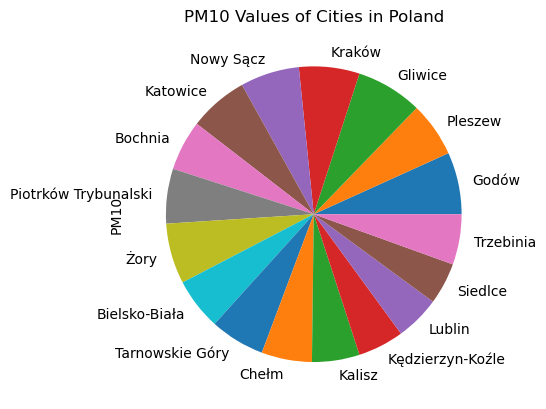

In [20]:
pollution_df.loc['Poland']['PM10'].plot(
    kind = 'pie',
    title = 'PM10 Values of Cities in Poland'
)

<Axes: xlabel='Country,City/Town'>

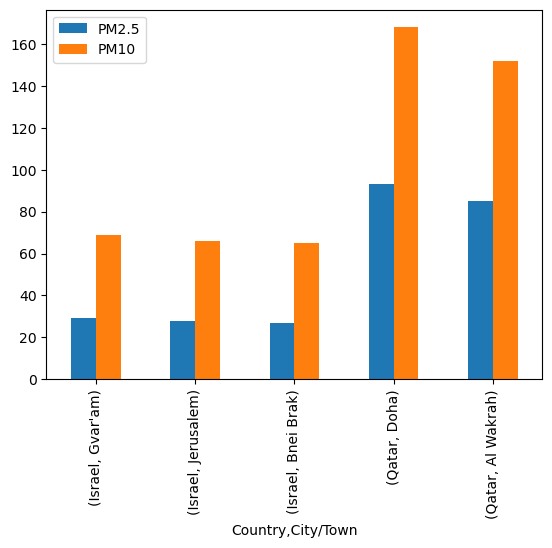

In [21]:
pollution_df.loc[["Israel", "Qatar"], ["PM2.5", "PM10"]].plot(kind = 'bar')

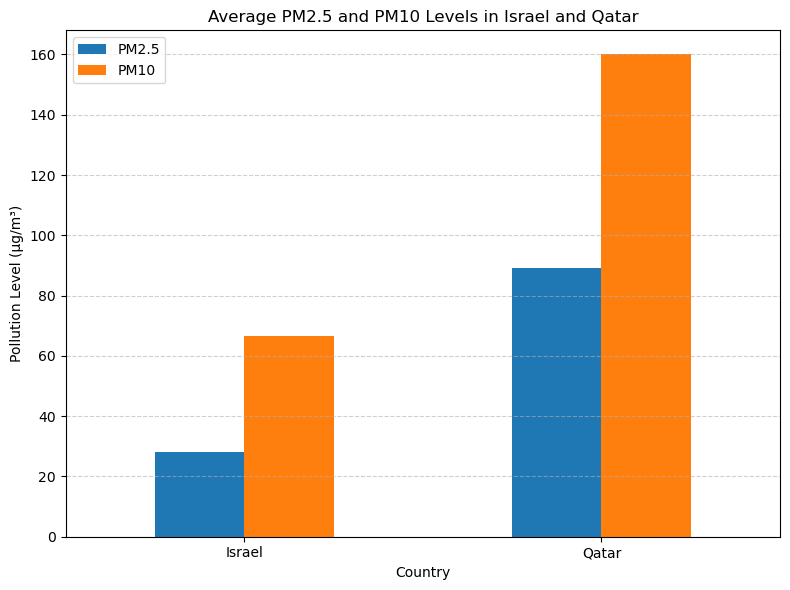

In [22]:
country_avg = pollution_df.loc[["Israel", "Qatar"], ["PM2.5", "PM10"]].groupby(level=0).mean()

country_avg.plot(kind='bar', figsize=(8, 6), color=["#1f77b4", "#ff7f0e"])
plt.title("Average PM2.5 and PM10 Levels in Israel and Qatar")
plt.ylabel("Pollution Level (μg/m³)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
